In [55]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')#,header=0, index_col=0, parse_dates=True,squeeze=True)

# Print the first five rows of the dataset
cocacola.head()



,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [56]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [59]:
 #Extract year and quarter from 'Quarter' column
cocacola['Year'] = cocacola['Quarter'].str[3:].astype(int)
cocacola['Quarter'] = cocacola['Quarter'].str[:2]

# Map quarters to start dates
quarter_start_dates = {
    'Q1': '01-01',
    'Q2': '04-01',
    'Q3': '07-01',
    'Q4': '10-01'
}

# Create new datetime index
cocacola.index = pd.to_datetime(cocacola['Year'].astype(str) + '-' + cocacola['Quarter'].map(quarter_start_dates))

# Drop the 'Year' column
cocacola.drop(columns=['Year'], inplace=True)

# Drop the 'Quarter' column if not needed anymore
cocacola.drop(columns=['Quarter'], inplace=True)

cocacola.head()

,Sales
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [60]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


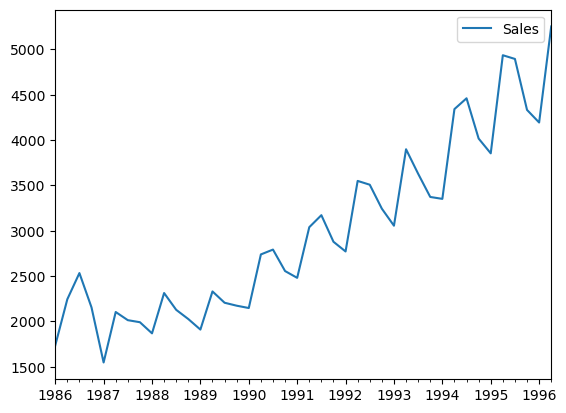

In [61]:
from matplotlib import pyplot

#series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
cocacola.plot()
pyplot.show()

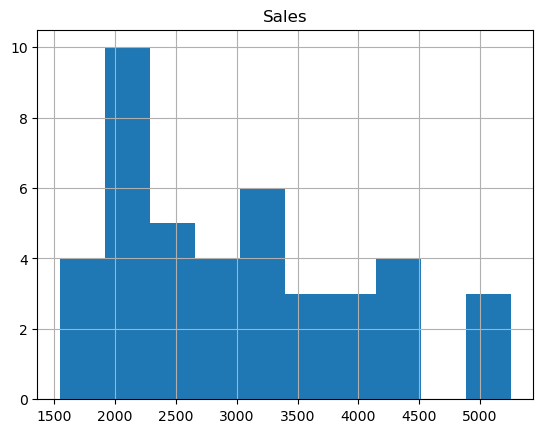

In [62]:
cocacola.hist()
pyplot.show()

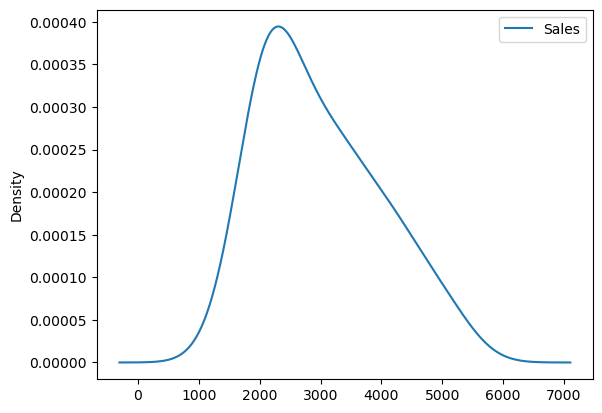

In [63]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot

cocacola.plot(kind='kde')
pyplot.show()

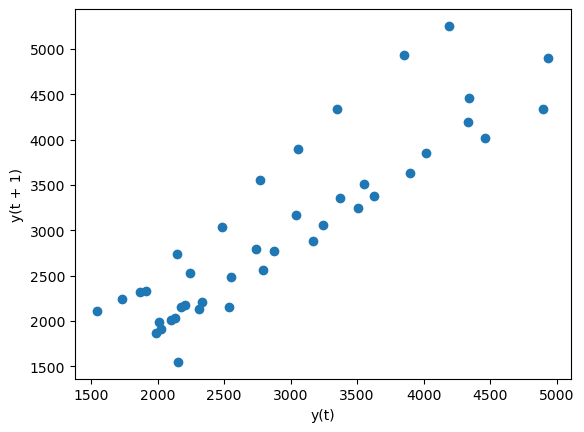

In [64]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True)
lag_plot(cocacola)
pyplot.show()

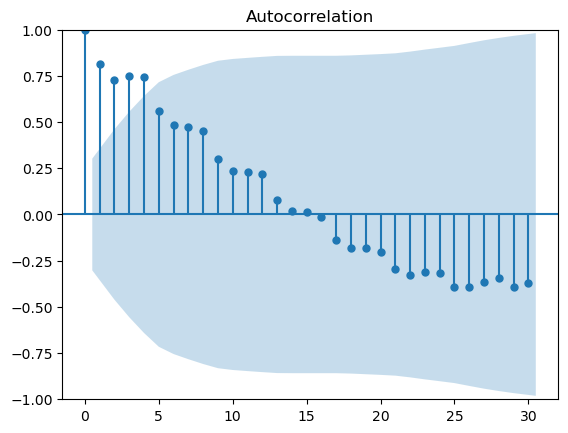

In [65]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True)
plot_acf(cocacola,lags=30)
pyplot.show()

In [67]:
upsampled = cocacola.resample('D').mean()
print(upsampled.head(32)) 

               Sales
1986-01-01  1734.827
1986-01-02       NaN
1986-01-03       NaN
1986-01-04       NaN
1986-01-05       NaN
1986-01-06       NaN
1986-01-07       NaN
1986-01-08       NaN
1986-01-09       NaN
1986-01-10       NaN
1986-01-11       NaN
1986-01-12       NaN
1986-01-13       NaN
1986-01-14       NaN
1986-01-15       NaN
1986-01-16       NaN
1986-01-17       NaN
1986-01-18       NaN
1986-01-19       NaN
1986-01-20       NaN
1986-01-21       NaN
1986-01-22       NaN
1986-01-23       NaN
1986-01-24       NaN
1986-01-25       NaN
1986-01-26       NaN
1986-01-27       NaN
1986-01-28       NaN
1986-01-29       NaN
1986-01-30       NaN
1986-01-31       NaN
1986-02-01       NaN


                  Sales
1986-01-01  1734.827000
1986-01-02  1740.495155
1986-01-03  1746.163311
1986-01-04  1751.831466
1986-01-05  1757.499622
1986-01-06  1763.167777
1986-01-07  1768.835933
1986-01-08  1774.504088
1986-01-09  1780.172244
1986-01-10  1785.840400
1986-01-11  1791.508555
1986-01-12  1797.176711
1986-01-13  1802.844866
1986-01-14  1808.513022
1986-01-15  1814.181177
1986-01-16  1819.849333
1986-01-17  1825.517488
1986-01-18  1831.185644
1986-01-19  1836.853799
1986-01-20  1842.521955
1986-01-21  1848.190111
1986-01-22  1853.858266
1986-01-23  1859.526422
1986-01-24  1865.194577
1986-01-25  1870.862733
1986-01-26  1876.530888
1986-01-27  1882.199044
1986-01-28  1887.867199
1986-01-29  1893.535355
1986-01-30  1899.203510
1986-01-31  1904.871666
1986-02-01  1910.539821


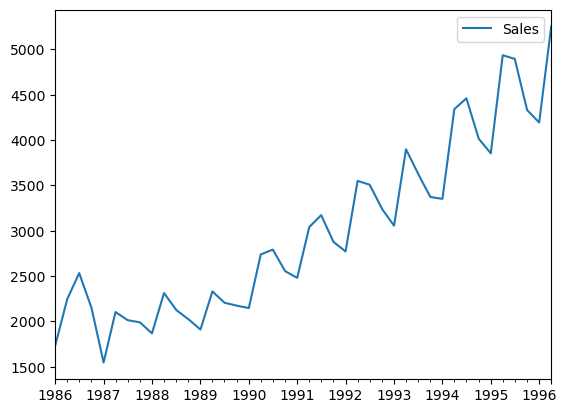

In [68]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show() 

In [71]:
# Transformations
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot 

In [73]:
dataframe = DataFrame(cocacola.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])  

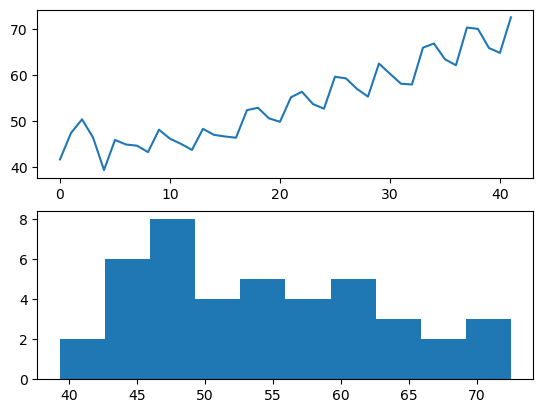

In [74]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show() 

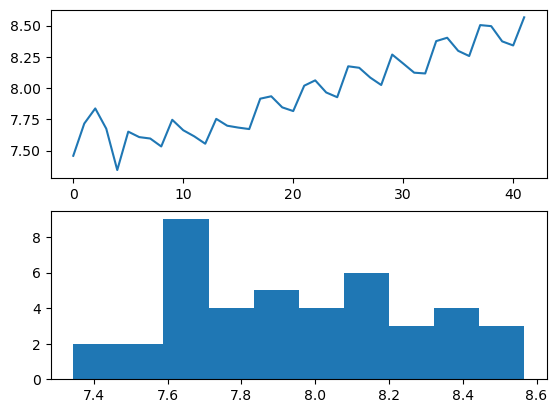

In [75]:
from numpy import log
dataframe = DataFrame(cocacola.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = log(dataframe['Sales'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show() 

In [76]:
dataframe.head()

,Sales
0,7.458663
1,7.716443
2,7.837477
3,7.675529
4,7.344602
